In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf
!pip install statsmodels==0.12.1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and di

In [5]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

ticker= "googl"
stock_data = yf.download(ticker, start="2016-01-04", end="2021-05-12")

[*********************100%***********************]  1 of 1 completed


In [41]:

ticker= "googl"
stock_data = yf.download(ticker, start="2016-01-04", end="2021-05-12")
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300


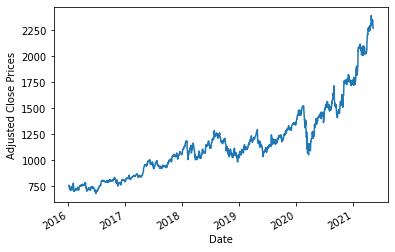

In [42]:

stock_data['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

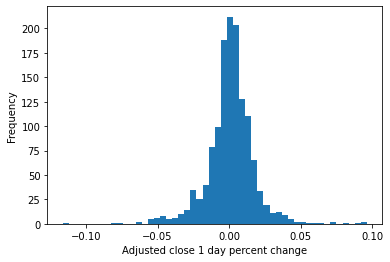

In [43]:
stock_data['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

In [44]:
stock_data['Adj Close'].pct_change()

Date
2016-01-04         NaN
2016-01-05    0.002752
2016-01-06   -0.002889
2016-01-07   -0.024140
2016-01-08   -0.013617
                ...   
2021-05-05    0.003442
2021-05-06    0.009755
2021-05-07    0.006238
2021-05-10   -0.025587
2021-05-11   -0.009464
Name: Adj Close, Length: 1348, dtype: float64

In [22]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-10-14 01:05:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-10-14 01:05:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-10-14 01:05:53--  http://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving iweb.dl.sourceforge.n

In [45]:
feature_names = []
for n in [14, 30, 50, 200]:
    stock_data['ma' + str(n)] = talib.SMA(stock_data['Adj Close'].values, timeperiod=n)
    stock_data['rsi' + str(n)] = talib.RSI(stock_data['Adj Close'].values, timeperiod=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [46]:
feature_names

['ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']

In [47]:
stock_data['Volume_1d_change'] = stock_data['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [48]:
feature_names

['ma14',
 'rsi14',
 'ma30',
 'rsi30',
 'ma50',
 'rsi50',
 'ma200',
 'rsi200',
 'Volume_1d_change']

In [49]:
stock_data.head(30)

,Open,High,Low,Close,Adj Close,Volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Volume_1d_change
Date,,,,,,,,,,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.328960
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066127
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309630
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.247513
2016-01-11,731.950012,735.080017,719.559998,733.070007,733.070007,2544800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071359
2016-01-12,740.750000,748.340027,736.429993,745.340027,745.340027,2340800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080163
2016-01-13,749.340027,753.000000,716.780029,719.570007,719.570007,2586400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104921
2016-01-14,724.440002,739.890015,705.000000,731.390015,731.390015,2777900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074041


In [50]:
#목표변수
stock_data['5d_future_close'] = stock_data['Adj Close'].shift(-5)
stock_data['5d_close_future_pct'] = stock_data['5d_future_close'].pct_change(5)

In [51]:
stock_data.head(20)

,Open,High,Low,Close,Adj Close,Volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Volume_1d_change,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733.070007,NaN
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.328960,745.340027,NaN
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066127,719.570007,NaN
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309630,731.390015,NaN
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.247513,710.489990,NaN
2016-01-11,731.950012,735.080017,719.559998,733.070007,733.070007,2544800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071359,719.080017,-0.019084
2016-01-12,740.750000,748.340027,736.429993,745.340027,745.340027,2340800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080163,718.559998,-0.035930
2016-01-13,749.340027,753.000000,716.780029,719.570007,719.570007,2586400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104921,726.669983,0.009867
2016-01-14,724.440002,739.890015,705.000000,731.390015,731.390015,2777900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074041,745.460022,0.019237


In [52]:
stock_data.dropna(inplace=True)

X = stock_data[feature_names]
y = stock_data['5d_close_future_pct']

train_size = int(0.85 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [53]:
X

,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Volume_1d_change
Date,,,,,,,,,
2016-10-18,806.243574,62.410490,803.949003,59.383942,802.204001,57.346334,754.359951,52.295207,1.167077
2016-10-19,807.972146,65.148070,804.577338,60.791305,802.591202,58.185180,754.686501,52.484215,-0.344734
2016-10-20,809.227147,60.525277,805.203670,58.740830,802.854003,57.069885,754.998000,52.281481,-0.070795
2016-10-21,810.918575,61.883787,806.389671,59.401540,803.171202,57.457977,755.413300,52.367728,0.159194
2016-10-24,813.272147,67.647178,807.620337,62.395790,803.745002,59.264157,755.937451,52.780011,-0.104097
...,...,...,...,...,...,...,...,...,...
2021-04-28,2281.367850,71.848010,2181.121655,66.728635,2132.648198,64.030023,1783.095896,58.255164,0.827288
2021-04-29,2290.088571,74.518014,2191.472990,68.210386,2138.130996,64.998573,1787.455396,58.574414,-0.491604
2021-04-30,2297.865705,66.598229,2202.544991,64.737831,2143.084795,62.983702,1791.638496,58.054888,0.087840


In [54]:
y

Date
2016-10-18    0.008594
2016-10-19   -0.005733
2016-10-20   -0.005209
2016-10-21   -0.005461
2016-10-24   -0.030919
                ...   
2021-04-28   -0.018766
2021-04-29   -0.023157
2021-04-30   -0.000667
2021-05-03   -0.021907
2021-05-04   -0.015940
Name: 5d_close_future_pct, Length: 1143, dtype: float64

In [55]:
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g) 
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

0.0270902388930232 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


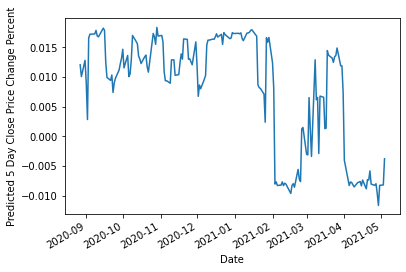

In [56]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03131461182177225
Mean Squared Error: 0.0017425011780125114
Root Mean Squared Error: 0.04174327703969241


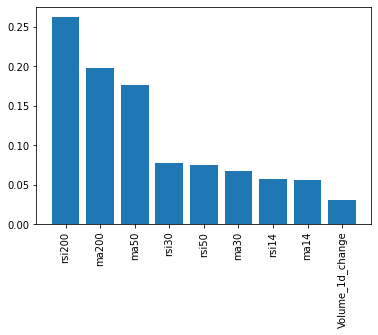

In [58]:
importances = rf_model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x_values = range(len(importances))
labels = np.array(feature_names)[sorted_index]
plt.bar(x_values, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()